<h1>Tackling an open problem</h1>

For this homework the idea is to hone our skills on exploring and plotting a dataset. You can either work with the Pokemon dataset that was given or download your own. If you opt to download your own I recommend you use one of the datasets available on kaggle,

https://www.kaggle.com/datasets

As they tend to be found in a clean format and are generally free to use.

Largely, the main objective is learning how to search the internet for new implementations you want to use on your code helping you develop your self-confidence.

There's no right or wrong, pick a dataset you enjoy and try to have some fun.
If you need, use the notebook from the previous session as a guideline.


In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [238]:
'''
I downloaded this data because my mother and mother in law have diabetes and pokemons are of my least interest
but it took quite a while in understanding how this dataset can be analysed and how to read DPF, which kinds of 
plots would be useful for this kind of data and how could they be created using panda and matplotlib
that I could only manage till one plot but I have learnt more than I could put in the assignment.
'''
#I have downloaded Diabetes dataset from kaggle and its usability is 10
DiabetesDF=pd.read_csv('D:\Code Course For Assignments\Python-Module\Datasets\Diabetes.csv')

In [239]:
print(DiabetesDF)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [240]:
#We can see from the first three entries of insulin below and some entries of insulin above and also of skin thickness
#are 0 meaning they have no value inside and the dataset needs cleaning
DiabetesDF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [241]:
DiabetesDF.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [242]:

#we can get more information about the dataset using info 

DiabetesDF.info()

#According to the info() it doesnt look like we have any missing values but 0 for insulin and skin thickness is not reasonable and cannot be true

#Lets see how many of our values are equal to zero as the isnull() function will not work

missingValue=0
for key in DiabetesDF.columns:
    print(key+':')
    x=float(0.0)
    for x in DiabetesDF[key]:
        if x==0.0:
            missingValue=missingValue+1       
    print(f'missing value for {key} are {missingValue}')
    missingValue=0
    
#As we can see Insulin has 374 values equal to zero so this coloumn is not useful for analysis and 
#can be dropped. Also SkinThickness has 227 missing values so that can be dropped too
DiabetesDF.shape

DiabetesDF=DiabetesDF.drop(['Insulin','SkinThickness'],axis=1)
DiabetesDF=DiabetesDF.dropna()

print(f'After Dropping Coloumns{DiabetesDF.shape}')

#Now we will get rid of rows with zero value except for Outcome and Pregnancy which make sense
DiabetesDF=DiabetesDF[~(DiabetesDF[DiabetesDF.columns[1:-1]]==0).any(axis=1)]

#Lets take a look after dropping rows
print(f'After Dropping rows {DiabetesDF.shape}')
            
        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Pregnancies:
missing value for Pregnancies are 111
Glucose:
missing value for Glucose are 5
BloodPressure:
missing value for BloodPressure are 35
SkinThickness:
missing value for SkinThickness are 227
Insulin:
missing value for Insulin are 

In [244]:
#How many people in this dataframe have diabetes out of 724 people
No_of_Diabetics=DiabetesDF['Outcome'].value_counts()[1]
print(No_of_Diabetics)

249


In [245]:
#Showcase the People with BMI > 25 "25 or above are considered over weight or obese"
DiabetesDF[DiabetesDF['BMI']>25]

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1
5,5,116,74,25.6,0.201,30,0
...,...,...,...,...,...,...,...
763,10,101,76,32.9,0.171,63,0
764,2,122,70,36.8,0.340,27,0
765,5,121,72,26.2,0.245,30,0
766,1,126,60,30.1,0.349,47,1


In [246]:
#Lets see the data of people with high BMI who are diabetic as well.
DiabetesDF[(DiabetesDF['BMI']>25)&(DiabetesDF['Outcome']==1)]

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
4,0,137,40,43.1,2.288,33,1
6,3,78,50,31.0,0.248,26,1
8,2,197,70,30.5,0.158,53,1
11,10,168,74,38.0,0.537,34,1
...,...,...,...,...,...,...,...
755,1,128,88,36.5,1.057,37,1
757,0,123,72,36.3,0.258,52,1
759,6,190,92,35.5,0.278,66,1
761,9,170,74,44.0,0.403,43,1


In [247]:
#No of People with high BMI with Diabetes
#this shows the relationship of BMI with diabetes
len(DiabetesDF[(DiabetesDF['BMI']>25)&(DiabetesDF['Outcome']==1)])

242

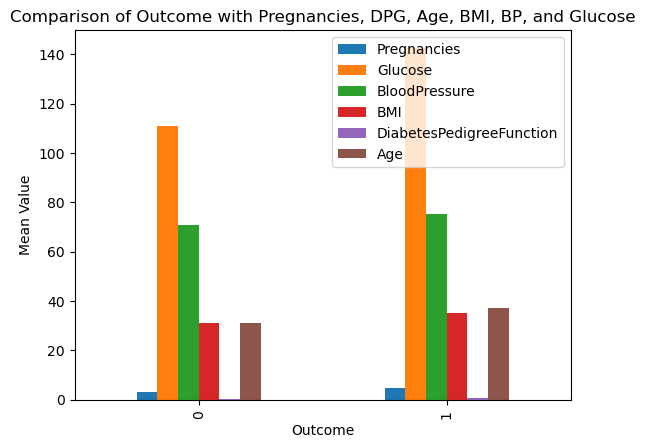

In [256]:
# Group the data by Outcome and calculate the mean of each key
grouped_df = DiabetesDF.groupby('Outcome')[['Pregnancies', 'Glucose', 'BloodPressure','BMI', 'DiabetesPedigreeFunction', 'Age']].mean()

grouped_df.head()

#Create a bar plot
grouped_df.plot(kind='bar')

#Add labels and title
plt.xlabel('Outcome')
plt.ylabel('Mean Value')
plt.title('Comparison of Outcome with Pregnancies, DPG, Age, BMI, BP, and Glucose')
plt.show()

#This graph explains that Glucose, Blood Pressure and Age are closely related to Diabetes